# Table of Contents

1. [Introduction](#introduction)
2. [Data Profiling](#data-profiling)
    1. [Numerical Variables](#numerical-variables)
    2. [Categorical Variables](#categorical-variables)

# Introduction

In this notebook, we'll be exploring some fundamental concepts of Data Science and Machine Learning. To this end, we'll be using the [**Sleep Health and Lifestyle Dataset**](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) from Kaggle. The descritpion of the dataset is the following:

### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

##### Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

---

Let's begin by importing some of the necessary libraries and importing the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

sleep_df = pd.read_csv('./sleep_health_and_lifestyle_dataset.csv', index_col='Person ID')
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Profiling
Before doing any sort of analysis, we need to obtain information about the data, evaluate the quality of the dataset, identify any problems that might have to be dealth with, and then ponder which questions may be interesting to ask and how we could get them answered.

Let's start by obtaining information about the data. One of the first questions that should be asked is: are there missing values in our data? Missing values can be a big problem, if they are very present in our dataset.

In [17]:
sleep_df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Great! There are **no missing values** in our data! This means that we won't have to bother removing columns / rows due to missing values, or imputing missing values. Now, let's get a big picture view of the remaining data. Let's start with numerical our numerical variables.

In [86]:
import numpy as np

discrete_att = sleep_df.select_dtypes('int64').columns
numeric_att = sleep_df.select_dtypes(np.number).columns
categorical_att = sleep_df.select_dtypes('object').columns
cat_no_labels = categorical_att.tolist().remove('Sleep Disorder')

print(sleep_df.dtypes)
print("Number of discrete numeric attributes:", len(discrete_att))
print("Number of (total) numeric attributes:", len(numeric_att))
print("Number of categorical attributes:", len(categorical_att))

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Sys. BP                    float64
Dya. BP                    float64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object
Number of discrete numeric attributes: 6
Number of (total) numeric attributes: 9
Number of categorical attributes: 4


We can see that we have 5 categorical attributes. Of these, gender is a **binary attribute**, and occupation, BMI, and sleep disorder are **nominal attributes**. Blood pressure, however, is stored as a string of the format systolic/dyastolic. We should convert this to two different columns on the dataframe of a numeric type.

The remaining attributes are numeric. Some of them are discrete (like the Daily Steps or the Heart Rate), and others are continuous (like Sleep Duration). Furthermore, an idiosyncrasy of this dataset, is that all of our numeric attributes are **ordinal** (i.e. they can be naturally ordered in a specific manner. Finally, we have **interval-scaled attributes** (i.e. quality of sleep and stress level; both provide a certain "ranking" and do not have an inherent zero value), and **ratio-scaled attributes** (i.e. age, sleep duration, physical activity level, blood pressure (after conversion), heart rate, and daily steps; all of these have an inherent zero value).

Let's first convert blood pressure before we move on.

In [4]:
sleep_df['Sys. BP'] = sleep_df['Blood Pressure'].map(lambda x: x.split('/')[0]).astype(np.number)
sleep_df['Dya. BP'] = sleep_df['Blood Pressure'].map(lambda x: x.split('/')[1]).astype(np.number)
sleep_df = sleep_df.drop('Blood Pressure', axis=1)

In [5]:
# let's reorder the columns
sleep_df = sleep_df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Sys. BP', 'Dya. BP', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Sys. BP,Dya. BP,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126.0,83.0,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125.0,80.0,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125.0,80.0,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140.0,90.0,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140.0,90.0,85,3000,Sleep Apnea


In [27]:
sleep_df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Sys. BP                    0
Dya. BP                    0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
discrete_att = sleep_df.select_dtypes('int64').columns
numeric_att = sleep_df.select_dtypes(np.number).columns

print(sleep_df.dtypes)
print("Number of discrete numeric attributes:", len(discrete_att))
print("Number of (total) numeric attributes:", len(numeric_att))
print("Number of categorical attributes:", len(categorical_att))

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Sys. BP                    float64
Dya. BP                    float64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object
Number of discrete numeric attributes: 6
Number of (total) numeric attributes: 9
Number of categorical attributes: 4


Right. Now, everything is in order. Let's move on to further profiling of the data.

## Numeric and Ordinal Variables

Let's start by visualising the distribution of the data, using histograms.

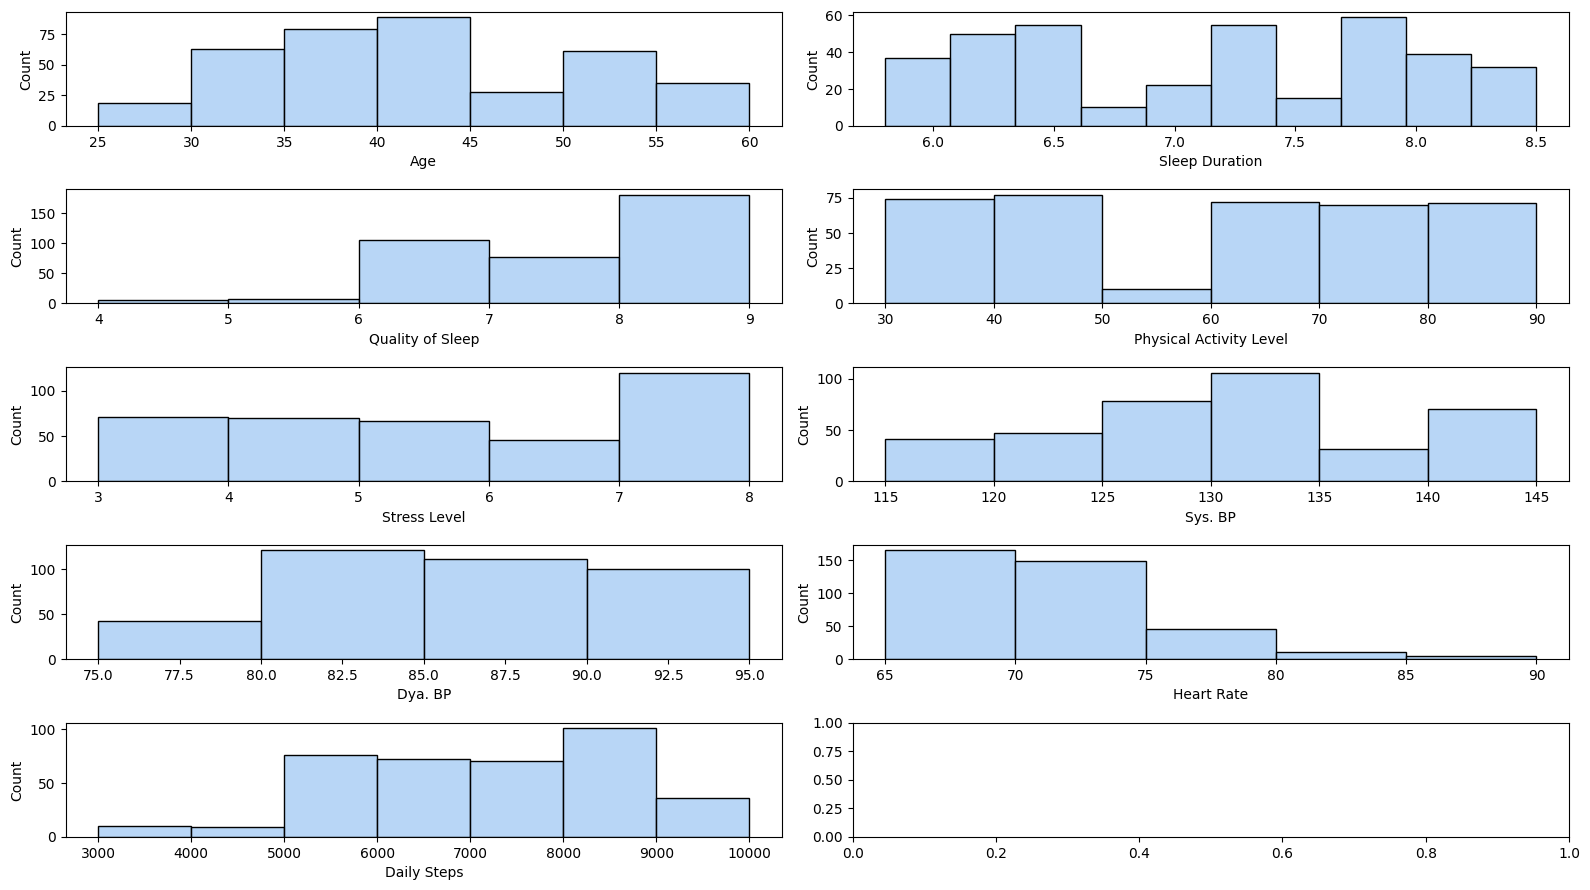

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 9))

# we need to define proper bins to get a good idea of the distribution of the data
bins = [np.arange(25, 61, 5),           # age
        'auto',                         # sleep duration
        np.arange(4, 10),               # qos
        np.arange(30, 91, 10),          # pal
        np.arange(3, 9),                # sl
        np.arange(115, 150, 5),
        np.arange(75, 100, 5),
        np.arange(65, 91, 5),           # hr
        np.arange(3000, 10001, 1000)    # ds
        ]

ax = ax.flatten()

for i in range(len(ax) - 1):
    sns.histplot(data=sleep_df[numeric_att[i]], ax=ax[i], bins=bins[i])

plt.tight_layout()

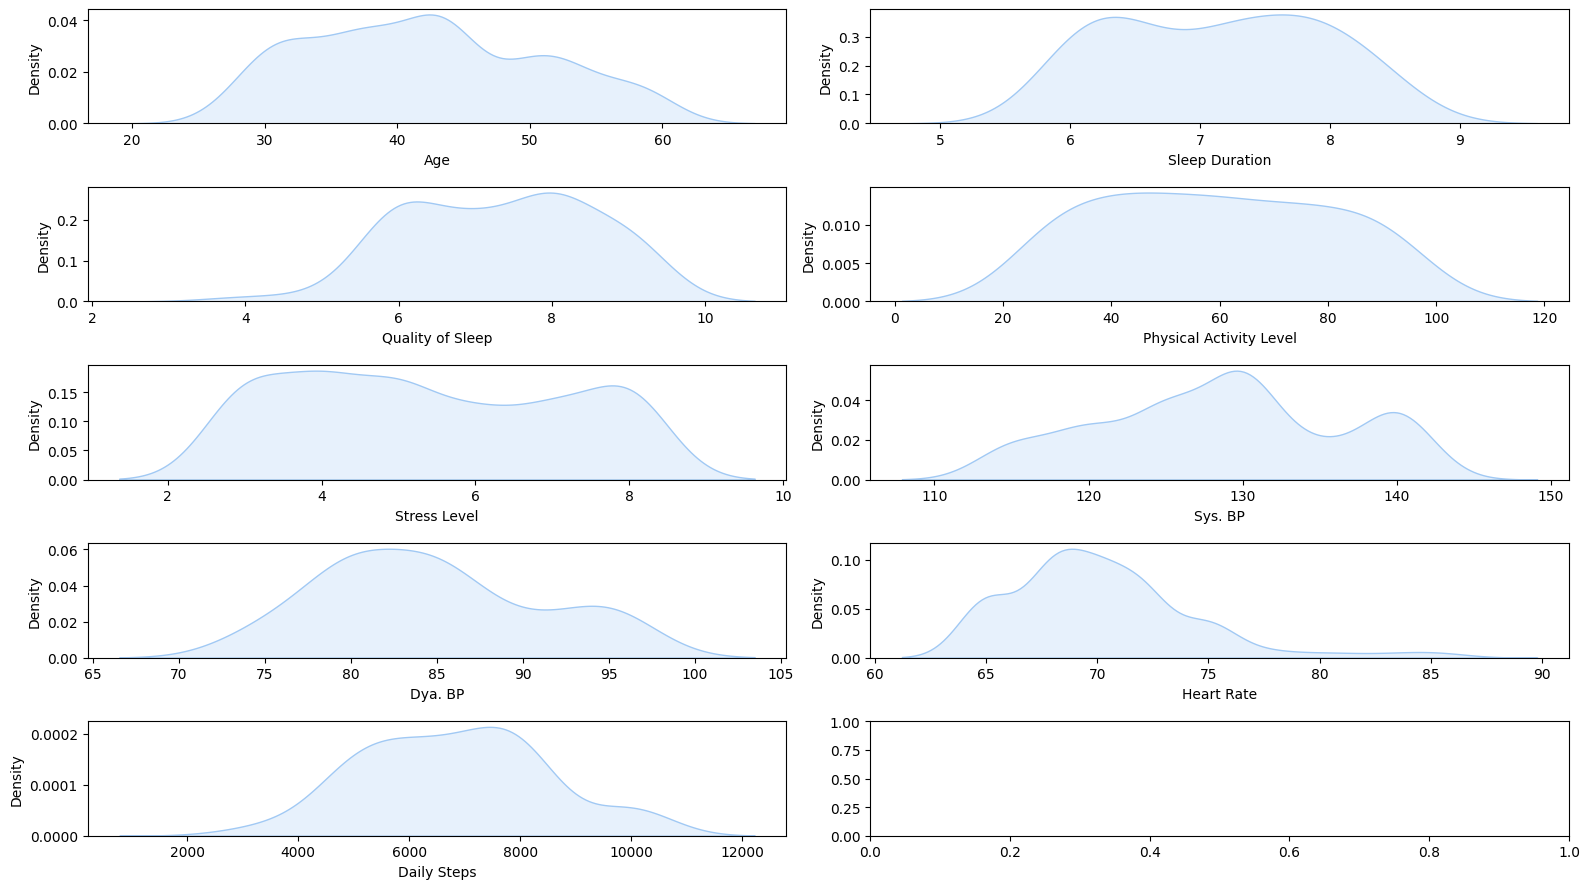

In [41]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 9))

ax = ax.flatten()

bw_adjust = [1,
             1.5,
             1.5,
             1.5,
             1,
             1,
             1.5,
             1,
             1.5
            ]

for i in range(len(ax) - 1):
    sns.kdeplot(data=sleep_df[numeric_att[i]], ax=ax[i], bw_adjust=bw_adjust[i], fill=True)

plt.tight_layout()

Here, we can visualise the distribution of our data, for each numeric attribute. We can see that some attributes are not symetrically distributed, and have some level of skewness. In these cases, the mean is not a good indicator of the centrality of the data; we should use the median instead. Therefore, when measuring dispersion in these cases, we should focus on measures related to the IQR (Inter-Quartile Range), and not the variance, since the latter is based on dispersion around the mean.

Let's move on to the five-number summaries and boxplots.

In [29]:
sleep_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Sys. BP,Dya. BP,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


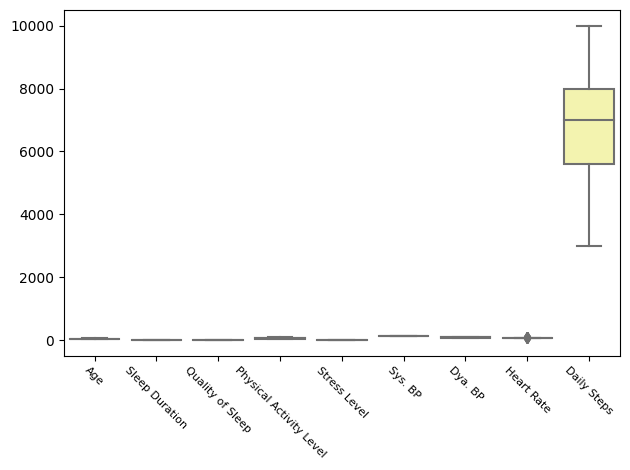

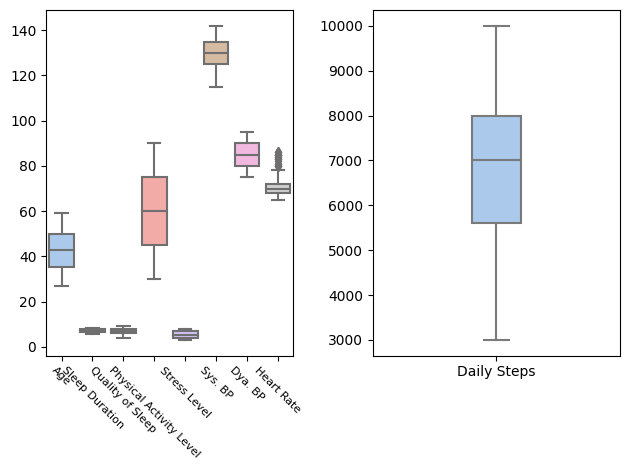

In [30]:
sns.boxplot(data=sleep_df)
plt.xticks(rotation=-45, fontsize=8)
plt.tight_layout()
plt.show()

fig, (ax0, ax1) = plt.subplots(ncols=2)
sns.boxplot(data=sleep_df.loc[:, sleep_df.columns != 'Daily Steps'], ax=ax0)
ax0.tick_params('x', labelrotation=-45, labelsize=8)

sns.boxplot(data=sleep_df.loc[:, sleep_df.columns == 'Daily Steps'], ax=ax1, width=0.2)

plt.tight_layout()
plt.show()

We can see that some numerical variables have considerably different scales. Let's use two other different boxplots: one for the Age, Physical Activity Level, Heart Rate, and Blood Pressure, and another for the Sleep Duration, Quality of Sleep, and Stress Level.

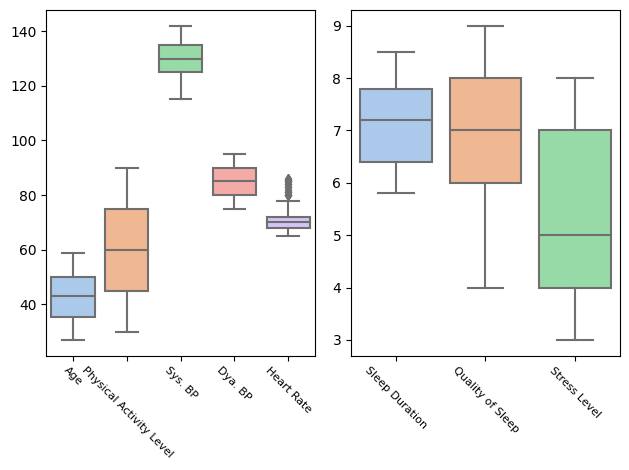

In [33]:
fig, (ax0, ax1) = plt.subplots(ncols=2)
sns.boxplot(data=sleep_df.loc[:, sleep_df.columns.isin(['Age', 'Physical Activity Level', 'Heart Rate', 'Sys. BP', 'Dya. BP'])], ax=ax0)
ax0.tick_params('x', labelrotation=-45, labelsize=8)

sns.boxplot(data=sleep_df.loc[:, sleep_df.columns.isin(['Sleep Duration', 'Quality of Sleep', 'Stress Level'])], ax=ax1)
ax1.tick_params('x', labelrotation=-45, labelsize=8)

plt.tight_layout()
plt.show()

From these boxplots, we can see that our numeric and ordinal variables are relatively well-behaved. A few insights that we can take from these plots:

- The heart rate variable has a few outliers that go beyond the 1.5IQR $(1.5 \times (Q_3 - Q_1))$. It might be interesting to understand why these people are so different from the rest.
- We can also see that the Physical Activity Level and the Daily Steps are the variables with the highest dispersion, something that could also be seen by their standard deviation.
- Stress Level's median is slightly skewed to the left.

Now, we might want to visualise if any of these variables is correlated with the others. We can do this by doing a scatter plot with each pair of variables, as well as a heatmap. 

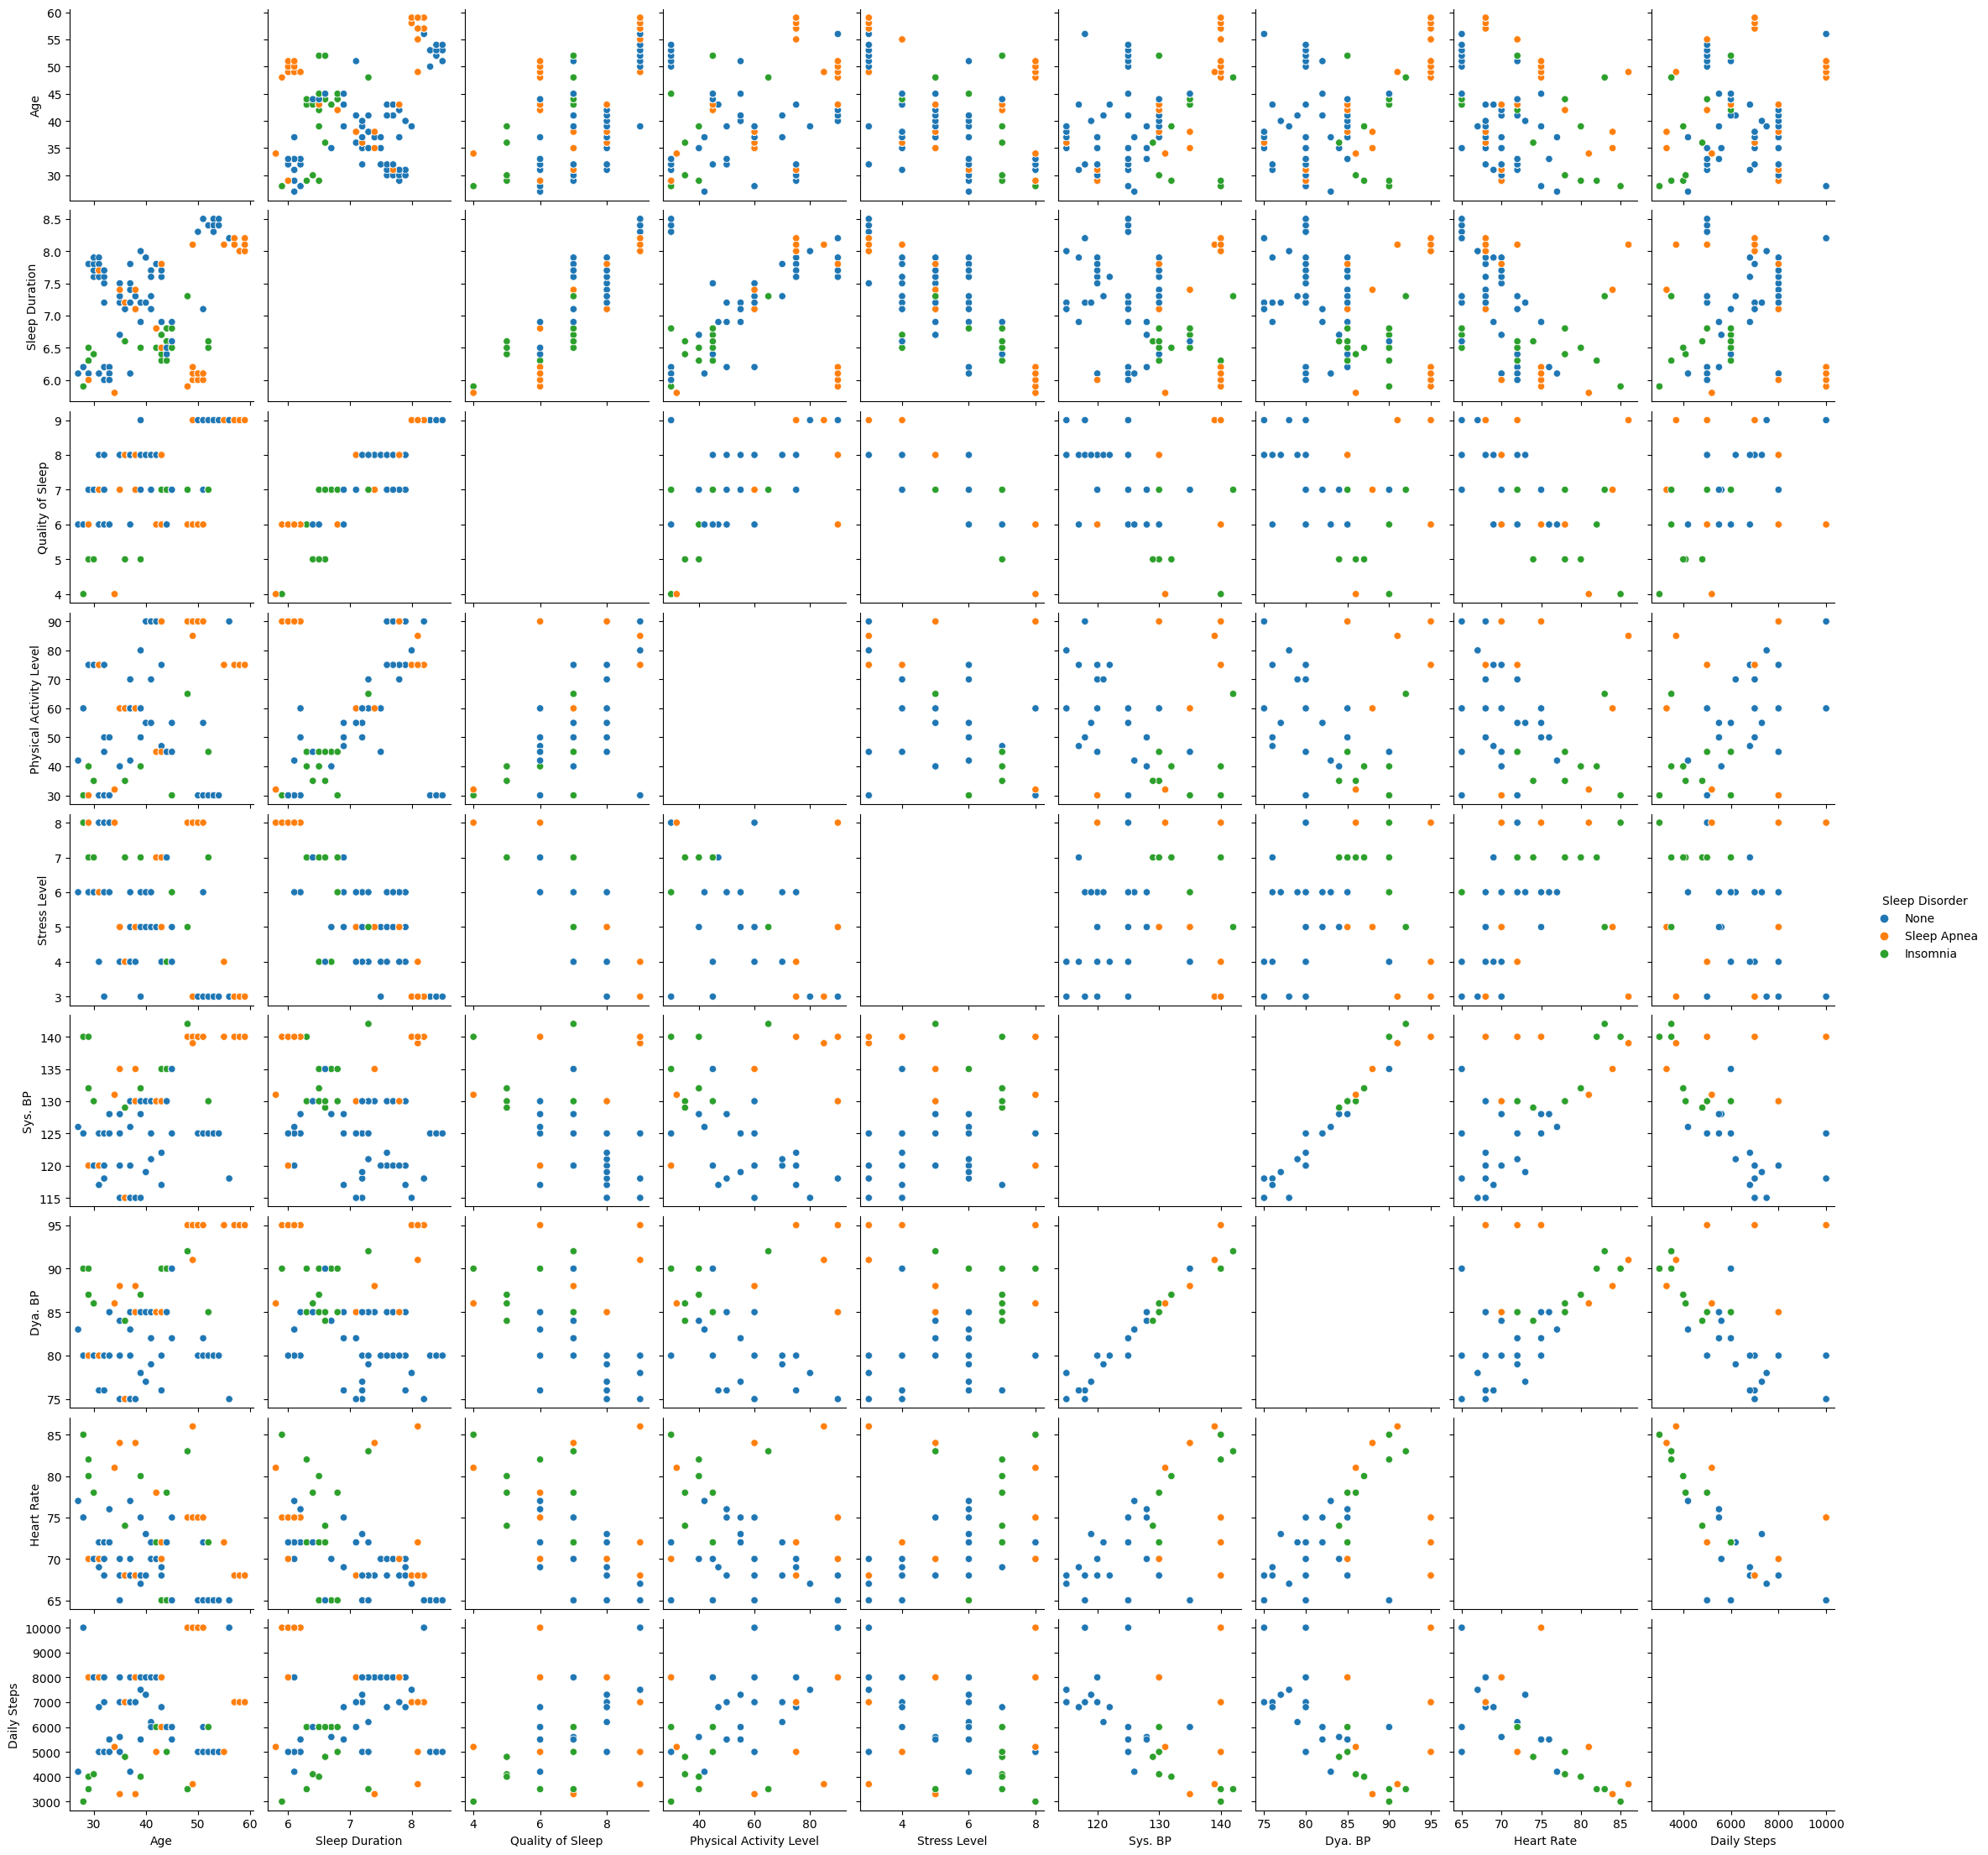

In [45]:
sns.pairplot(data=sleep_df, diag_kind='scatter', hue='Sleep Disorder', palette='tab10')

Here, we can see the relationships between **pairs** of variables *in our data*, as well as with which Sleep Disorder label they are associated with.

We can see through these scatter plots that, if we were to use only two variables, our future task of predicting to which class a data point would belong to, would be very hard, since there are very few cases in which the classes are clearly separated.

There are, nonetheless, some relationships that we can already visualise: for example, if someone has a longer sleep duration combined with a low blood pressure, then they are likely to not have a sleep disorder, and vice-versa. Or, if you have a shorter sleep duration, combined with a lower activity level, then you're likely to have insomnia.

Let's move on to the correlation heatmap.

<AxesSubplot: >

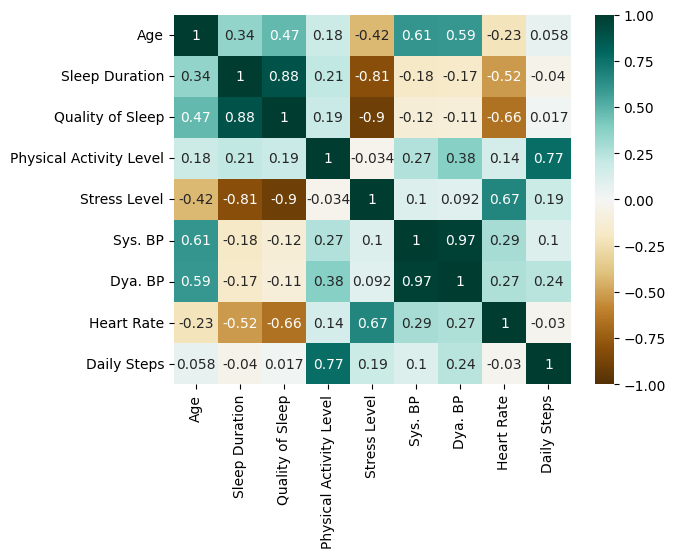

In [36]:
sns.heatmap(data=sleep_df.corr(numeric_only=True), vmin=-1, vmax=1, cmap='BrBG', annot=True)

In the correlation heatmap, a few things are worth noting:
- **Age** has a few interesting, modest correlations, namely positive correlations with Quality of Sleep and Blood Pressure, and a negative correlation with the Stress Level;
- **Sleep Duration** has a very significant positive correlation with the Quality of Sleep, and a high negative correlation with the Stress Level. It is also modestly negatively correlated with the Heart Rate;
- The **Quality of Sleep** is highly negatively correlated with the Stress Level, and has a medium-high positive correlation with the Heart Rate;
- The **Physical Activity Level** has a high correlation with the Daily Steps (unsurprisingly);
- **Stress Level** has a medium positive correlation with the Heart Rate;
- The **Systemic** and **Dyastolic Blood Pressures** are highly correlated with one another;

This means that we have some possibly redundant information in our dataset, that we might consider removing.

Now, let's take a look at our categorical data.

## Categorical variables

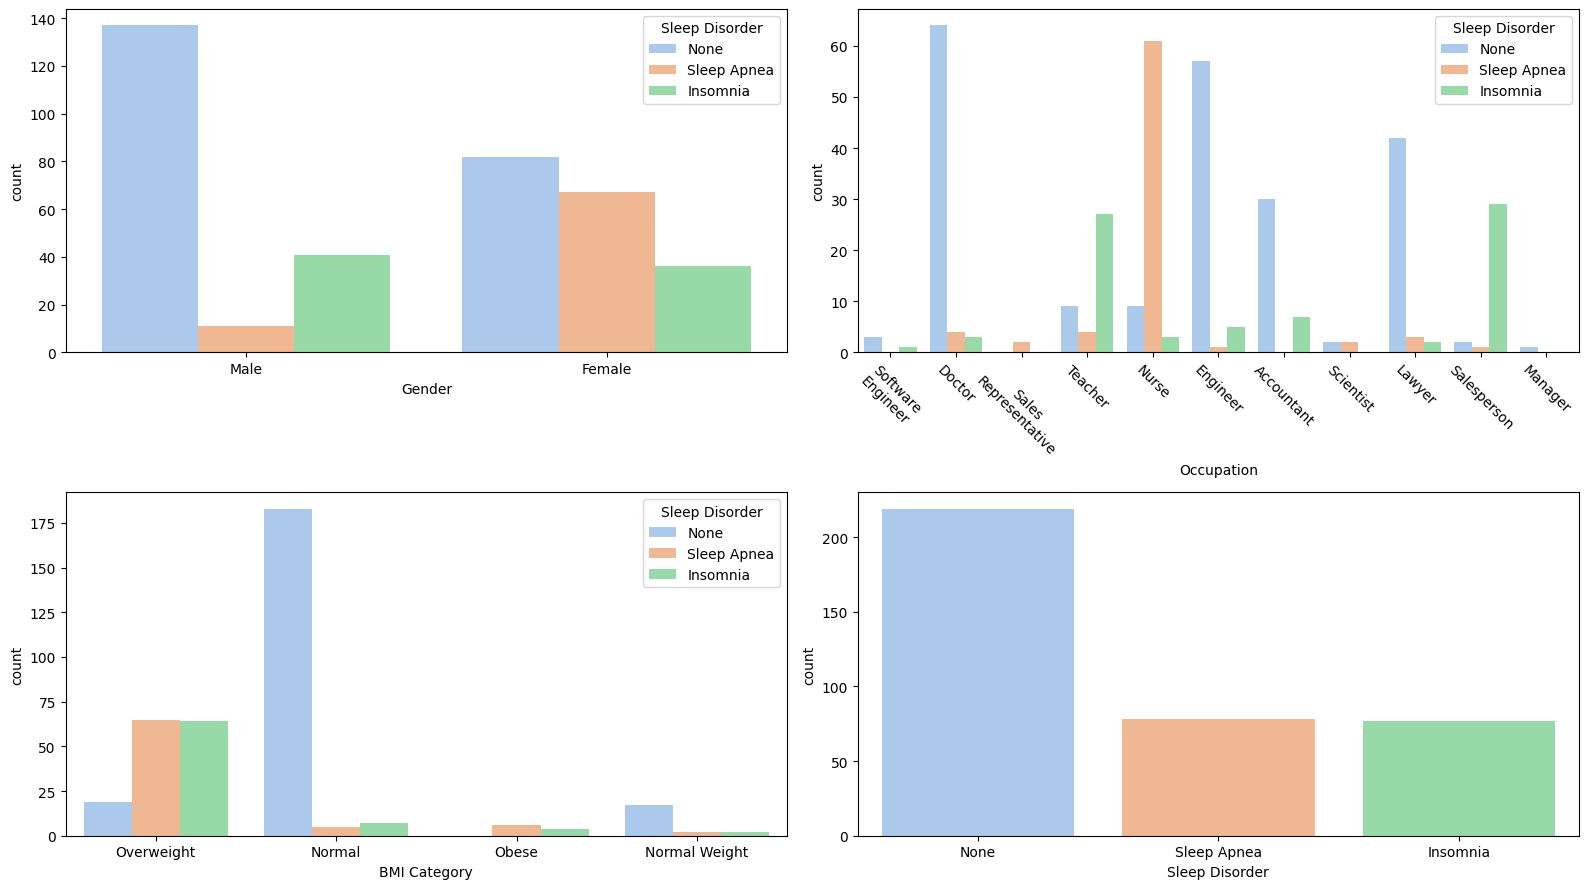

In [98]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

ax = ax.flatten()

for i in range(4):
    if i!= 3:
        sns.countplot(data=sleep_df, x=categorical_att[i], ax=ax[i], hue='Sleep Disorder')

        if i == 1:
            labels = ax[i].get_xticklabels()

            modified_labels = []
            for label in labels:
                words = label.get_text().split(' ')
                if len(words) >= 2:
                    modified_labels.append('\n'.join(words))
                else:
                    modified_labels.append(label.get_text())

            # Set the modified tick labels
            ax[i].set_xticklabels(modified_labels)
            ax[i].tick_params('x', rotation=-45)

    else:
        sns.countplot(data=sleep_df, x=categorical_att[i], ax=ax[i])

plt.tight_layout()

Here, we can see, for example, that most Male participants did not have sleep disorders, but, if they did, then most of them had Insomnia. Female participants, however, had higher incidence of sleep disorders, mostly Sleep Apnea. Insomnia had a similar incidence in Female and Male participants.

While we do not have a representative sample of each profession, we can see that most nurses that participated had Sleep Apnea, and that nearly all Salespeople had Insomnia.

BMI Category has a possible problem: it can be both 'normal' or 'normal weight', which should be the same thing. Other than that, we can see that most people under a normal BMI do not have sleep disorders, while most people that are underweight do.

Regarding our set of labels, We can see that most of the dataset is comprised of "None", i.e. people with no sleep disorders; our dataset is unbalanced. This can bias our classifiers towards mostly predicting a datapoint as "None".